# Lab 2: Matrix operations and image manipulation:

1. To begin, let us load the image into numpy. This can be done by using the imread() function from the matplotlib library. This function allows numpy to read graphic files with different extensions. The output is a two-dimensional array with the dimensions equal to the dimensions of the image, and the values corresponding to the colors of the pixels.
    Here we will work with a grayscale image, so the elements in the array will be integers ranging from 0 to 255 in the numpy integer format uint8. Type in the following code to load the file “fibonacci.jpg” into numpy:
    ```python
    from matplotlib import pyplot as plt
    ImJPG = plt.imread('fibonacci.jpg')
    #you can get the image from the link https://ydjemmada.github.io/fibonacci.jpg
    ```
    The array ImJPG is a two-dimensional array of the type uint8 which contains values from 0 to 255 corresponding to the color of each individual pixel in the image, where 0 corresponds to black and 255 to white. You can visualize this array by printing it in the console:

    ```python
    print(ImJPG)#prints the array values
    plt.imshow(ImJPG,cmap='gray')#shows the image
    ```
2. Use the shape attribute to check the dimensions of the obtained array ImJPG:
    ```python
    m, n = ImJPG.shape
    ```
    1. What are the dimensions of the image?

3. Check the type of the array ImJPG by using the dtype attribute: ImJPG.dtype The output of the dtype attribute is a numpy data type.

4. Find the range of colors in the image by using the amin and amax functions and save those elements as maxImJPG and minImJPG:
    ```python
    maxImJPG = np.amax(ImJPG)
    minImJPG = np.amin(ImJPG)
    ```

5. Finally, display the image on the screen by using imshow: 
    ```python
    plt.imshow(ImJPG, cmap='gray')
    ```
    If you did everything correctly, you should see the image displayed on your screen in a separate window.
6. To crop the image in numpy, we can select a subarray from the original array `ImJPG`. The rows and columns we want to keep from the original array can be specified using indexing. The following code will select the central part of the image leaving out 100 pixels from the top and bottom, and 100 pixels on the left and 70 pixels on the right, and display the result using matplotlib:
    ```python
    ImJPG_center = ImJPG[100:m-100, 100:n-70]
    import matplotlib.pyplot as plt
    plt.imshow(ImJPG_center, cmap='gray')
    plt.show()
    ```
    This will create a new figure window displaying the cropped image.

7. We can paste the selected part of the image into another image. To do this, create a zero matrix using the command:

    ```python
    ImJPG_border = np.zeros((m, n), dtype=np.uint8)
    ```
    Then paste the preselected matrix ImJPG_center into matrix ImJPG_border and display the image:

    ```python
    ImJPG_border[100:m-100, 100:n-70] = ImJPG_center
    plt.figure()
    plt.imshow(ImJPG_border, cmap='gray')
    ```
    Notice the use of the data type np.uint8. It is necessary to use this data type because by default the array will be of the type float, and imshow command does not work correctly with this type of array.
8. To flip the image vertically using NumPy, we can use the flipud function::
    ```python
    ImJPG_vertflip = np.flipud(ImJPG)
    plt.imshow(ImJPG_vertflip, cmap='gray')
    ```
    This will create a new array ImJPG_vertflip that is a vertically flipped version of the original array ImJPG.

9. To transpose the matrix using NumPy, we can use the transpose attribute:
    ```python
    ImJPG_transpose = ImJPG.transpose()
    plt.imshow(ImJPG_transpose, cmap='gray')
    ```
10. To flip the image horizontally using NumPy, we can combine the transpose attribute and the fliplr function:
    ```python
    ImJPG_horflip = np.fliplr(ImJPG)
    plt.imshow(ImJPG_horflip, cmap='gray')
    plt.show()

    ```
11. To rotate the image by 90 degrees using NumPy, we can use the rot90 function:
    ```python
    ImJPG90 = np.rot90(ImJPG)
    plt.imshow(ImJPG90, cmap='gray')
    ```
12. Try running the following numpy commands:
    ```python
    ImJPG_inv = 255-ImJPG
    plt.imshow(ImJPG_inv)
    plt.show()
    ```
    Display the resulting image using matplotlib's imshow function in a new figure window. Note that the constant 255 is subtracted from the array ImJPG, which mathematically does not make sense. However, in numpy, the constant 255 is treated as an array of the same size as ImJPG with all the elements equal to 255. Explain what happened to the image.
13. It is also easy to lighten or darken images using matrix addition. For instance, the following code will create a darker image:
    ```python
    ImJPG_dark=np.clip(np.array(ImJPG, dtype='int16') - 50, 0, 255)
    plt.imshow(ImJPG_dark,cmap='gray')
    plt.show()
    ```
    You can darken the image even more by changing the constant to a number larger than 50. Note that this command can technically make some of the elements of the array to become negative. However, because the ImJPG array type is int16, with the function clip those elements are automatically rounded to zero.
    
14. Let us create Andy Warhol style art with the image provided. To do so we will arrange four copies of the image into a 2×2 matrix. For the top left corner we will take the unaltered image. For the top right corner we will darken the image by 50 shades of gray. For the bottom left corner, lighten the image by 100 shades of gray, and finally, for the bottom right corner, lighten the image by 50 shades of gray. Then we will arrange the images together in one larger matrix using numpy's concatenation function. Finally, display the resulting block matrix as a single image using matplotlib's imshow function.
    ```python
    im1 = ImJPG
    im2 = np.clip(np.array(ImJPG, dtype='int16') - 50, 0, 255)
    im3 = np.clip(np.array(ImJPG, dtype='int16') + 100, 0, 255)
    im4 = np.clip(np.array(ImJPG, dtype='int16') + 50, 0, 255)
    row1 = np.concatenate((im1, im2), axis=1)
    row2 = np.concatenate((im3, im4), axis=1)
    ImJPG_warhol = np.concatenate((row1, row2), axis=0)
    plt.imshow(ImJPG_warhol,cmap='gray')
    plt.show()
    ```
15. Numpy has several functions which allow one to round any number to the nearest integer or a decimal fraction with a given number of digits after the decimal point. Those functions include: floor which rounds the number towards negative infinity (to the smaller value), ceil which rounds towards positive infinity (to the larger value), round which rounds towards the nearest decimal or integer, and fix which rounds towards zero.

    A naive way to obtain black and white conversion of the image can be accomplished by making all the gray shades which are darker or equal to a medium gray (described by a value 128) to appear as a complete black, and all the shades of gray which are lighter than this medium gray to appear as white. This can be done, for instance, by using the code:
    ```python
    ImJPG_bw = np.uint8(255*np.floor(ImJPG/128))
    plt.imshow(ImJPG_bw, cmap='gray')
    plt.show()
    ```
    Note that this conversion to black and white results in a loss of many details of the image. There are possibilities to create black and white conversions without losing so many details. Also, notice the function np.uint8 used to convert the result back to the integer format.
16. Write code to reduce the number of shades in the image from 256 to 8 using the round function. Save the resulting array as 'ImJPG8' and display it in a separate window.
    ```python
    ImJPG8 = np.round(ImJPG / 32)
    plt.imshow(ImJPG8.astype('uint8'), cmap='gray')
    plt.show()
    ```
17. Increase the contrast of the image by changing the range of possible shades of gray. One way to do this is to scalar multiply the array by a constant. Use the following code:

    ```python
    ImJPG_HighContrast = np.clip((1.25 * ImJPG),0,255)
    plt.imshow(ImJPG_HighContrast, cmap='gray')
    plt.show()
    ```
    Observe the result by displaying the image. You can manipulate the contrast by increasing or decreasing the constant (we use 1.25 in this case). Note that this operation may cause some elements of the array to become outside the 0-255 range, potentially leading to data loss. Save the resulting array as 'HighContrast'.

18. Apply gamma correction to the image using the following code:
    ```python
    ImJPG_Gamma05 = np.clip(ImJPG** 0.95,0,255)
    plt.imshow(ImJPG_Gamma05, cmap='gray')
    plt.show()
    ImJPG_Gamma15 = np.clip(ImJPG ** 1.15,0,255)
    plt.imshow(ImJPG_Gamma15, cmap='gray')
    plt.show()
    ```
    Observe the results by displaying the images. The above code will produce two images, one with gamma equal to 0.95 (ImJPG_Gamma05) and one with gamma equal to 1.05 (ImJPG_Gamma15). Gamma correction is a nonlinear operation that can be used to adjust the brightness and contrast of an image.

[[248 246 244 ... 247 249 249]
 [249 248 248 ... 249 250 250]
 [250 251 251 ... 250 249 249]
 ...
 [215 218 176 ...   0  10  10]
 [194 136 104 ...   6   0   1]
 [125  98 123 ...   9  17  24]]


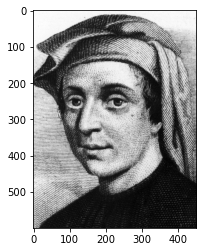

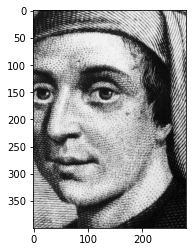

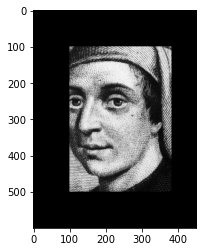

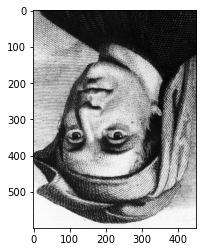

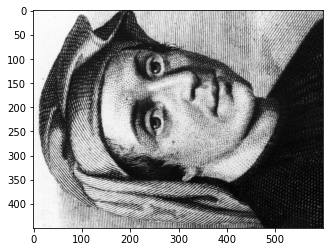

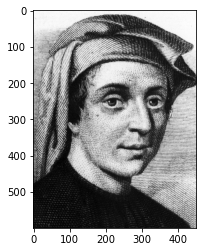

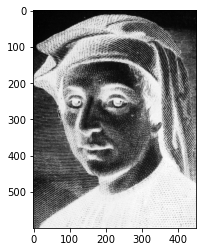

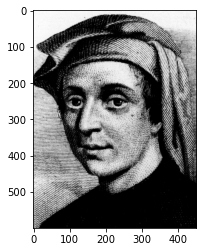

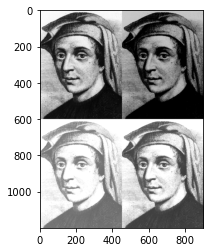

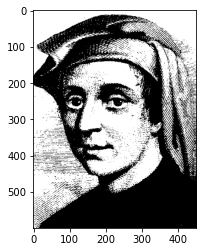

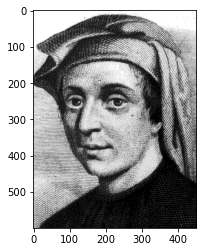

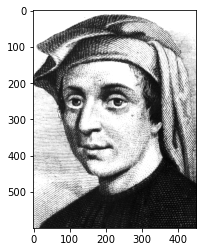

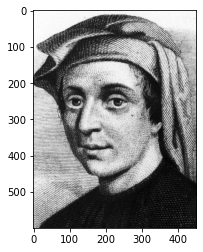

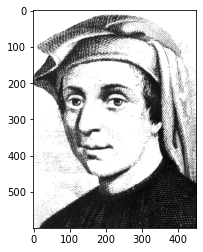

In [2]:
from matplotlib import pyplot as plt
import numpy as np
ImJPG = plt.imread('fibonacci.jpg')
#ImJPG.dtype
print(ImJPG)
plt.imshow(ImJPG,cmap='gray')
plt.show()
m, n = ImJPG.shape
ImJPG_center = ImJPG[100:m-100, 100:n-70]
import matplotlib.pyplot as plt
plt.imshow(ImJPG_center, cmap='gray')
plt.show()
ImJPG_border = np.zeros((m, n), dtype=np.uint8)
ImJPG_border[100:m-100, 100:n-70] = ImJPG_center
plt.figure()
plt.imshow(ImJPG_border, cmap='gray')
ImJPG_vertflip = np.flipud(ImJPG)
plt.show()
plt.imshow(ImJPG_vertflip, cmap='gray')
ImJPG_transpose = ImJPG.transpose()
plt.show()
plt.imshow(ImJPG_transpose,cmap='gray')
plt.show()
ImJPG_horflip = np.fliplr(ImJPG)
plt.imshow(ImJPG_horflip, cmap='gray')
plt.show()
ImJPG_inv = 255-ImJPG
plt.imshow(ImJPG_inv,cmap='gray')
plt.show()
ImJPG_dark=np.clip(np.array(ImJPG, dtype='int16') - 50, 0, 255)
plt.imshow(ImJPG_dark,cmap='gray')
plt.show()
im1 = ImJPG
im2 = np.clip(np.array(ImJPG, dtype='int16') - 50, 0, 255)
im3 = np.clip(np.array(ImJPG, dtype='int16') + 100, 0, 255)
im4 = np.clip(np.array(ImJPG, dtype='int16') + 50, 0, 255)
row1 = np.concatenate((im1, im2), axis=1)
row2 = np.concatenate((im3, im4), axis=1)
ImJPG_warhol = np.concatenate((row1, row2), axis=0)
plt.imshow(ImJPG_warhol,cmap='gray')
plt.show()
ImJPG_bw = np.uint8(255*np.floor(ImJPG/128))
plt.imshow(ImJPG_bw, cmap='gray')
plt.show()
ImJPG8 = np.round(ImJPG / 32)
plt.imshow(ImJPG8.astype('uint8'), cmap='gray')
plt.show()
ImJPG_HighContrast = np.clip((1.25 * ImJPG),0,255)
plt.imshow(ImJPG_HighContrast, cmap='gray')
plt.show()
ImJPG_Gamma05 = np.clip(ImJPG** 0.95,0,255)
plt.imshow(ImJPG_Gamma05, cmap='gray')
plt.show()
ImJPG_Gamma15 = np.clip(ImJPG ** 1.15,0,255)
plt.imshow(ImJPG_Gamma15, cmap='gray')
plt.show()

In [9]:
np.clip?

In [60]:
import numpy as np

img = np.array([[100, 15], [200, 50]])

img = np.clip(img - 50, 0, None)

print(img)

[[ 50   0]
 [150   0]]


In [65]:
x = np.array([0, 255, 10, 50, 64], dtype='int16')
x = np.maximum(x - 50, 0)
print(x)

[  0 205   0   0  14]


In [82]:
import numpy as np


# Load grayscale image
img = plt.imread('fibonacci.jpg')

# Subtract 50 from all pixel values
img_dark = np.clip(img.astype('int16') - 100, 0, 255)

# Display the original and darker image side by side
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(img_dark,cmap='gray')
plt.show()
print(img,img_dark)

TypeError: _clip_dispatcher() missing 1 required positional argument: 'a_max'

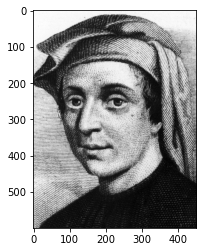

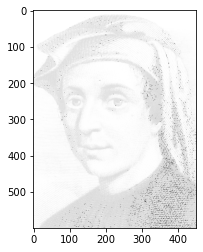

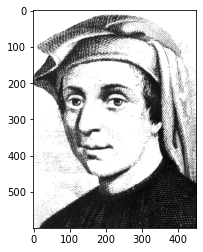

In [36]:
plt.imshow(ImJPG, cmap='gray')
plt.show()
ImJPG_Gamma05 = np.clip(ImJPG** 0.05,0,255)
plt.imshow(ImJPG_Gamma05, cmap='gray')
plt.show()
ImJPG_Gamma15 = np.clip(ImJPG ** 1.15,0,255)
plt.imshow(ImJPG_Gamma15, cmap='gray')
plt.show?
plt.show()




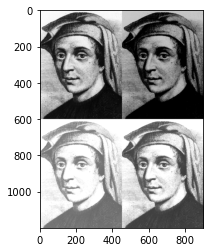

In [12]:
ImJPG90 = np.rot90(ImJPG)
print(ImJPG90)
np.

In [19]:
np.floor?